In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:37<00:00, 33.5MB/s]
100% 1.06G/1.06G [00:37<00:00, 30.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras  import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN model

model  = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.5459 - accuracy: 0.5822 - val_loss: 0.6418 - val_accuracy: 0.6102
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6403 - accuracy: 0.6360 - val_loss: 0.6430 - val_accuracy: 0.6562
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5855 - accuracy: 0.6743 - val_loss: 0.6107 - val_accuracy: 0.6724
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5095 - accuracy: 0.7273 - val_loss: 0.5248 - val_accuracy: 0.7406
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4508 - accuracy: 0.7649 - val_loss: 0.4813 - val_accuracy: 0.7600
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3982 - accuracy: 0.7948 - val_loss: 0.6075 - val_accuracy: 0.7432
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3530 - accuracy: 0.8138 - val_loss: 0.4826 - val_ac

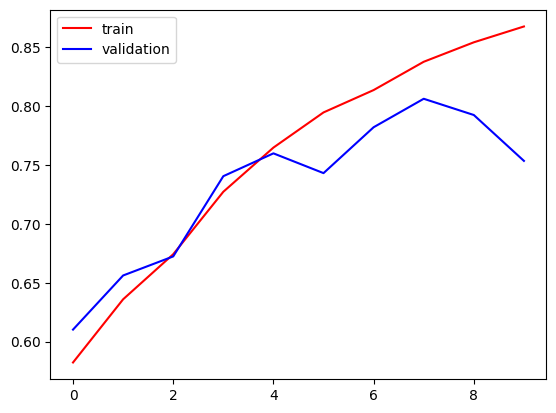

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

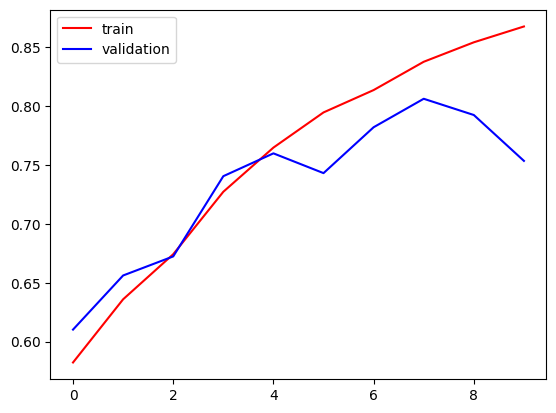

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

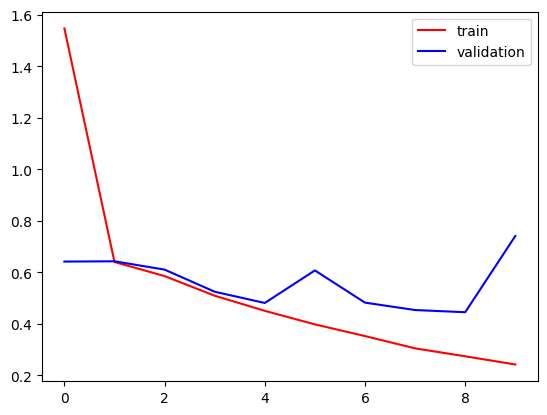

In [ ]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label='validation')
plt.legend()
plt.show()

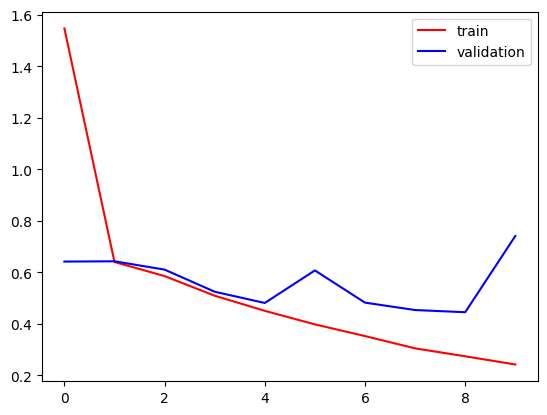

In [ ]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

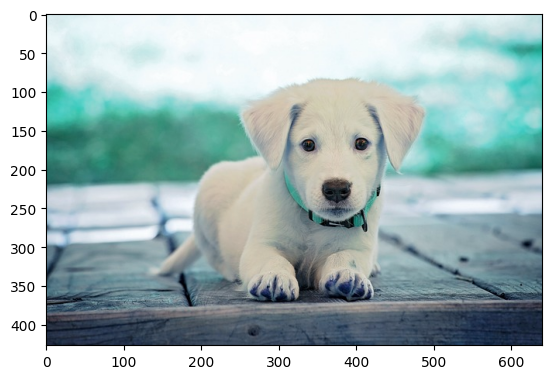

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(427, 640, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 397ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img1 = cv2.imread('/content/cat.jpg')

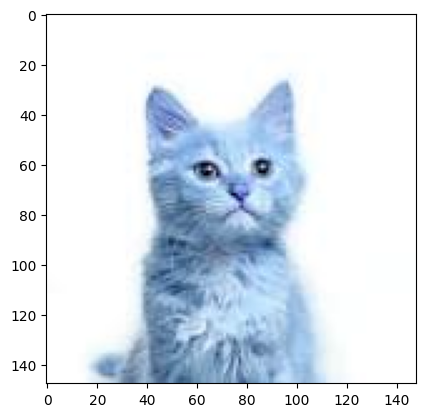

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

(148, 148, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 34ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/dog1.jpg')

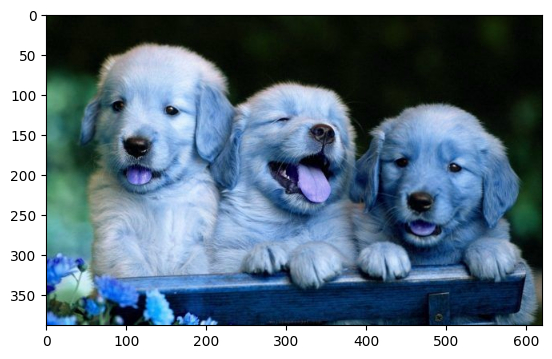

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(388, 620, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)